Import data to dataset and result format for sklearn

In [221]:
import pandas as pd
df = pd.read_csv('../data/train.csv')
dataset = []
result = []
for index, row in df.iterrows():
    data = []
    counter = 0
    for column in row:
        counter += 1
        if counter == 2:
            result.append(column)
        else:
            data.append(column)
    dataset.append(data)

In [228]:
import pandas as pd
import math
df = pd.read_csv('../data/train.csv')
dataset = []
result = []
for index, row in df.iterrows():
    data = []
    counter = 0
    for column in row:
        counter += 1
        if counter == 2:
            result.append(math.log(column))
        else:
            data.append(column)
    dataset.append(data)

In [13]:
import pandas as pd
import math
df = pd.read_csv('../data/train.csv')
dataset = []
result = []
for index, row in df.iterrows():
    data = []
    counter = 0
    for column in row:
        counter += 1
        if counter == 2:
            result.append(math.log(column))
        else:
            data.append(column)
    dataset.append(data)

# Adding difference temperature and humidity between inside and sekitar
for row in dataset:
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            row.append(row[index] - row[20])
        elif (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            row.append(row[index] - row[22])

# Adding tenth minute a weeks mean energy used, one weeks = 144x7xten minutes
total_energy = []
counter = []
mean_energy = []
for i in range(1008):
    total_energy.append(0)
    counter.append(0)

for index in range(len(dataset)):
    total_energy[int(dataset[index][0]%1008)] += result[index]
    counter[int(dataset[index][0]%1008)] += 1
    
for i in range(1008):
    mean_energy.append(float(total_energy[i])/float(counter[i]))

for index in range(len(dataset)):
    dataset[index].append(mean_energy[int(dataset[index][0]%1008)])

# Removing column A and Temperature Humidity Inside house
for row in dataset:
    for index in reversed(range(len(row))):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            del row[index]
        elif (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            del row[index]
    del row[0]

# Getting max and min value
max_value_dataset = []
min_value_dataset = []
first_iter = True
for row in dataset:
    counter = 0
    for value in row:
        if first_iter:
            max_value_dataset.append(value)
            min_value_dataset.append(value)
        else:
            if max_value_dataset[counter]<value:
                max_value_dataset[counter] = value
            if min_value_dataset[counter]>value:
                min_value_dataset[counter] = value
        counter += 1
    first_iter = False

# All column is being normalized
print dataset[0][1]
for row in dataset:
    counter = 0
    for value in row:
        row[counter] = float(value-min_value_dataset[counter])/float(max_value_dataset[counter]-min_value_dataset[counter])*9+1  
        counter += 1
print dataset[0][1]
print
# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # all positive
from sklearn.feature_selection import f_classif # can negative
from sklearn.feature_selection import mutual_info_classif # can negative

selector = SelectKBest(f_classif, k=15).fit(dataset,result)
x_new = selector.transform(dataset) # not needed to get the score
scores = selector.scores_
print scores
print len(x_new)
print len(x_new[0])
print
# Feature score
from sklearn import svm
clf = svm.SVR()
clf.fit(x_new, result)
prediction = clf.predict(x_new)

for i in range(10):
    print "result = "+str(result[i])+"\t prediction = "+str(prediction[i])

for i in range(len(prediction)):
    prediction[i] = math.exp(prediction[i])
    result[i] = math.exp(result[i])

for i in range(10):
    print "result = "+str(result[i])+"\t prediction = "+str(prediction[i])

from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(result, prediction))

7.02666666667
5.44147766539

[  24.26955591    9.87615338   11.75759651    8.09759461    3.99503307
   10.14766749    2.41666005    0.93960358    2.60330993    1.03189808
    1.03189808    3.99418762   12.98409261    2.87007017    9.57447673
    4.3382917    10.31798023    3.83770024   10.19089963    5.21578031
   10.58252802    4.47437809    7.01048755    2.7949886     4.86446672
    5.57822067    6.6048491   120.47328651]
13814
15

result = 4.09434456222	 prediction = 4.25446804647
result = 4.09434456222	 prediction = 4.25909575972
result = 3.91202300543	 prediction = 4.35704649742
result = 3.91202300543	 prediction = 4.15477324703
result = 4.09434456222	 prediction = 4.20177726679
result = 3.91202300543	 prediction = 4.24666093504
result = 4.09434456222	 prediction = 4.19389996514
result = 4.09434456222	 prediction = 4.22015260059
result = 4.09434456222	 prediction = 4.43193381388
result = 4.24849524205	 prediction = 4.53096499355
result = 60.0	 prediction = 70.4193474029
result = 6

84.84064129210607

In [15]:
for i in range(len(prediction)):
    result[i] = math.log(result[i])
    
prediction = clf.predict(x_new)

for i in range(10):
    print "result = "+str(result[i])+"\t prediction = "+str(prediction[i])

for i in range(len(prediction)):
    prediction[i] = math.exp(prediction[i])
    result[i] = math.exp(result[i])

for i in range(10):
    print "result = "+str(result[i])+"\t prediction = "+str(prediction[i])

from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(result, prediction))

result = 4.09434456222	 prediction = 4.25446804647
result = 4.09434456222	 prediction = 4.25909575972
result = 3.91202300543	 prediction = 4.35704649742
result = 3.91202300543	 prediction = 4.15477324703
result = 4.09434456222	 prediction = 4.20177726679
result = 3.91202300543	 prediction = 4.24666093504
result = 4.09434456222	 prediction = 4.19389996514
result = 4.09434456222	 prediction = 4.22015260059
result = 4.09434456222	 prediction = 4.43193381388
result = 4.24849524205	 prediction = 4.53096499355
result = 60.0	 prediction = 70.4193474029
result = 60.0	 prediction = 70.7459831555
result = 50.0	 prediction = 78.0263427645
result = 50.0	 prediction = 63.7375102395
result = 60.0	 prediction = 66.804955825
result = 50.0	 prediction = 69.8717162014
result = 60.0	 prediction = 66.2807802912
result = 60.0	 prediction = 68.0438670315
result = 60.0	 prediction = 84.0938816872
result = 70.0	 prediction = 92.8481156979


84.84064129210607

In [20]:
import pandas as pd
df = pd.read_csv('../data/test.csv')
datatest = []
for index, row in df.iterrows():
    data = []
    counter = 0
    for column in row:
        counter += 1
        data.append(column)
    datatest.append(data)
    
# Checking dataset
for index in range(10):
    print datatest[index]
    print
    
# Adding difference temperature and humidity between inside and sekitar
for row in datatest:
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            row.append(row[index] - row[20])
        elif (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            row.append(row[index] - row[22])

# Adding tenth minute a weeks mean energy used, one weeks = 144x7xten minutes
total_energy = []
counter = []
mean_energy = []
for i in range(1008):
    total_energy.append(0)
    counter.append(0)

for index in range(len(datatest)):
    total_energy[int(datatest[index][0]%1008)] += result[index]
    counter[int(datatest[index][0]%1008)] += 1
    
for i in range(1008):
    mean_energy.append(float(total_energy[i])/float(counter[i]))

for index in range(len(datatest)):
    datatest[index].append(mean_energy[int(datatest[index][0]%1008)])

# Checking dataset
for index in range(10):
    print datatest[index]
    print
    
# Removing column A and Temperature Humidity Inside house
for row in datatest:
    for index in reversed(range(len(row))):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            del row[index]
        elif (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            del row[index]
    del row[0]

# Checking dataset
for index in range(10):
    print datatest[index]
    print
    
# Getting max and min value
max_value_datatest = []
min_value_datatest = []
first_iter = True
for row in datatest:
    counter = 0
    for value in row:
        if first_iter:
            max_value_datatest.append(value)
            min_value_datatest.append(value)
        else:
            if max_value_datatest[counter]<value:
                max_value_datatest[counter] = value
            if min_value_datatest[counter]>value:
                min_value_datatest[counter] = value
        counter += 1
    first_iter = False

# All column is being normalized
print datatest[0][1]
for row in datatest:
    counter = 0
    for value in row:
        row[counter] = float(value-min_value_datatest[counter])/float(max_value_datatest[counter]-min_value_datatest[counter])*9+1  
        counter += 1
print datatest[0][1]
print

# Selection?
remove_index = [25,24,22,18,16,14,12,11,10,9,8,7,5]
for row in datatest:
    for i in remove_index:
        del row[i]

submission = clf.predict(datatest)

for i in range(10):
    print "prediction = "+str(submission[i])

for i in range(len(submission)):
    submission[i] = math.exp(submission[i])

for i in range(10):
    print "prediction = "+str(submission[i])
    
headers = ['B']
df = pd.DataFrame(submission,columns=headers)
df.to_csv('../data/submission3.csv')

[13815.0, 0.0, 22.426666666666698, 45.463333333333303, 21.533333333333296, 43.590000000000003, 25.390000000000001, 40.466666666666697, 22.0, 38.960000000000001, 20.890000000000001, 47.0, 10.3633333333333, 15.733333333333299, 21.390000000000001, 32.834000000000003, 23.789999999999999, 41.43, 21.100000000000001, 44.259999999999998, 10.5666666666667, 747.56666666666683, 68.0, 4.3333333333333295, 31.3333333333333, 4.8666666666666698, 46.580781380180262, 46.580781380180262]

[13816.0, 0.0, 22.390000000000001, 45.133333333333304, 21.463333333333296, 43.663333333333298, 25.323333333333295, 40.326666666666704, 22.0, 38.792857142857102, 20.890000000000001, 47.030000000000001, 9.363333333333328, 27.733333333333295, 21.390000000000001, 32.789999999999999, 23.856666666666698, 41.156666666666702, 21.100000000000001, 44.244999999999997, 10.699999999999999, 747.54999999999984, 68.0, 4.5, 33.5, 5.0, 26.853704336099327, 26.853704336099327]

[13817.0, 0.0, 22.390000000000001, 45.0, 21.390000000000001, 4

[0.0, 10.3633333333333, 15.733333333333299, 10.5666666666667, 747.56666666666683, 68.0, 4.3333333333333295, 31.3333333333333, 4.8666666666666698, 46.580781380180262, 46.580781380180262, 11.859999999999998, -22.536666666666697, 10.966666666666596, -24.409999999999997, 14.8233333333333, -27.533333333333303, 11.4333333333333, -29.039999999999999, 10.3233333333333, -21.0, 10.8233333333333, -35.165999999999997, 13.223333333333299, -26.57, 10.533333333333301, -23.740000000000002, 100.0]

[0.0, 9.363333333333328, 27.733333333333295, 10.699999999999999, 747.54999999999984, 68.0, 4.5, 33.5, 5.0, 26.853704336099327, 26.853704336099327, 11.690000000000001, -22.866666666666696, 10.763333333333296, -24.336666666666702, 14.623333333333296, -27.673333333333296, 11.300000000000001, -29.207142857142898, 10.190000000000001, -20.969999999999999, 10.690000000000001, -35.210000000000001, 13.156666666666698, -26.843333333333298, 10.400000000000002, -23.755000000000003, 116.66666666666664]

[0.0, 8.660000000

Feature Engineering / Creation

In [25]:
# Adding prev
for index in range(len(dataset)):
    if index == 0:
        dataset[index].append(0)
    else:
        dataset[index].append(result[index-1])

In [265]:
# Adding prev log hasil iterasi pertama
x_new_new = []
for index in range(len(x_new)):
    temp = []
    if index == 0:
        temp = np.append(x_new[index],[math.log(60)])
    else:
        temp = np.append(x_new[index],[prediction[index-1]])
    x_new_new.append(temp)

In [277]:
# Adding prev log hasil iterasi kedua
x_new_new_new = []
for index in range(len(x_new)):
    temp = []
    if index == 0:
        temp = np.append(x_new_new[index],[math.log(60)])
    else:
        temp = np.append(x_new_new[index],[prediction[index-1]])
    x_new_new_new.append(temp)

In [230]:
# Adding tenth minute a day mean energy used, one day = 144xten minutes
total_energy = []
counter = []
mean_energy = []
for i in range(144):
    total_energy.append(0)
    counter.append(0)

for index in range(len(dataset)):
    total_energy[int(dataset[index][0]%144)] += result[index]
    counter[int(dataset[index][0]%144)] += 1
    
for i in range(144):
    mean_energy.append(float(total_energy[i])/float(counter[i]))

for index in range(len(dataset)):
    dataset[index].append(mean_energy[int(dataset[index][0]%144)])

In [125]:
# Adding hour a day mean energy used, one day = 144xten minutes, 1 hour = 6xten minutes
total_energy = []
counter = []
mean_energy = []
for i in range(24):
    total_energy.append(0)
    counter.append(0)

for index in range(len(dataset)):
    total_energy[int(dataset[index][0]%144)//6] += result[index]
    counter[int(dataset[index][0]%144)//6] += 1
    
for i in range(24):
    mean_energy.append(float(total_energy[i])/float(counter[i]))

for index in range(len(dataset)):
    dataset[index].append(mean_energy[int(dataset[index][0]%144)//6])

In [ ]:
# Adding tenth minute a weeks mean energy used, one weeks = 144x7xten minutes
total_energy = []
counter = []
mean_energy = []
for i in range(1008):
    total_energy.append(0)
    counter.append(0)

for index in range(len(dataset)):
    total_energy[int(dataset[index][0]%1008)] += result[index]
    counter[int(dataset[index][0]%1008)] += 1
    
for i in range(1008):
    mean_energy.append(float(total_energy[i])/float(counter[i]))

for index in range(len(dataset)):
    dataset[index].append(mean_energy[int(dataset[index][0]%1008)])

In [82]:
# Adding average temperature inside house
for row in dataset:
    total_temperature = 0
    counter = 0
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            total_temperature += row[index]
            counter += 1
    mean_temperature = float(total_temperature)/float(counter)
    row.append(mean_temperature)

In [83]:
# Adding average humidity inside house
for row in dataset:
    total_humidity = 0
    counter = 0
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            total_humidity += row[index]
            counter += 1
    mean_humidity = float(total_humidity)/float(counter)
    row.append(mean_humidity)

In [84]:
# Adding average temperature outside house
for row in dataset:
    mean_temperature = (row[12]+row[20]+row[25])/3
    row.append(mean_temperature)

In [85]:
# Adding average humidity outside house
for row in dataset:
    mean_temperature = (row[13]+row[22])/2
    row.append(mean_temperature)

In [ ]:
# Adding difference between temperature inside and outside
for row in dataset:
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            row.append(row[index] - row[12])

In [ ]:
# Adding difference between humidity inside and outside
for row in dataset:
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            row.append(row[index] - row[13])

In [71]:
# Adding difference temperature and humidity between inside and outside
for row in dataset:
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            row.append(row[index] - row[12])
        elif (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            row.append(row[index] - row[13])

In [229]:
# Adding difference temperature and humidity between inside and sekitar
for row in dataset:
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            row.append(row[index] - row[20])
        elif (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            row.append(row[index] - row[22])

In [ ]:
# Cancel adding any new feature
for row in dataset:
    row = row[:-1]

Feature Selection / Removal By Naked Eye

In [42]:
# Removing column A
for row in dataset:
    del row[0]

In [100]:
# Removing column A and Temperature Humidity Inside house
for row in dataset:
    for index in reversed(range(len(row))):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            del row[index]
        elif (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            del row[index]
    del row[0]

In [73]:
# Removing column A and Temperature Humidity Outside and Inside house (exclude sekitar)
for row in dataset:
    for index in reversed(range(len(row))):
        if (index > 1) and (index < 20):
            del row[index]
    del row[0]

In [231]:
# Removing column A and Temperature Humidity Sekitar and Inside house
for row in dataset:
    for index in reversed(range(len(row))):
        if ((index > 1) and (index <= 20) and (index != 12) and (index != 13)) or (index == 22):
            del row[index]
    del row[0]

In [87]:
# Removing column A and Temperature Humidity Outside, Sekitar and Inside house
for row in dataset:
    for index in reversed(range(len(row))):
        if ((index > 1) and (index <= 20)) or (index == 22) or (index == 25):
            del row[index]
    del row[0]

Data Checker

In [278]:
# Checking dataset
for index in range(10):
    print x_new_new_new[index]
    print

[ 4.85714286  3.93536081  3.51505133  3.57596639  3.97170732  5.06990014
  3.17197622  4.04113992  5.04952004  3.47427653  5.71437724  4.09434456
  4.09434456]

[ 4.85714286  3.80430928  3.5044806   3.58504202  4.03402439  5.11483595
  3.17197622  4.03149775  5.11122962  3.47876705  5.71958315  4.16670172
  3.91788723]

[ 4.85714286  3.74724625  3.48947277  3.60672269  4.01902439  5.15977175
  3.16065849  4.01317763  5.13179948  3.46978601  6.12351774  4.21717495
  4.01262461]

[ 6.14285714  3.7133953   3.48373064  3.61680672  3.99463415  5.20470756
  3.16065849  3.99244697  5.17979583  3.45481761  7.24018416  4.25537838
  4.05074851]

[ 6.14285714  3.7520821   3.47433444  3.61680672  3.96634146  5.26248217
  3.16065849  3.98376902  5.22779217  3.45481761  7.23308841  4.12531207
  4.11072401]

[ 6.14285714  3.70759228  3.46963633  3.60672269  3.99560976  5.28174037
  3.15448518  3.98810799  5.27578851  3.43835237  7.13075419  4.13114323
  3.99435972]

[ 7.42857143  3.66987266  3.469636

Normalization each column

In [232]:
# Getting max and min value
max_value_dataset = []
min_value_dataset = []
first_iter = True
for row in dataset:
    counter = 0
    for value in row:
        if first_iter:
            max_value_dataset.append(value)
            min_value_dataset.append(value)
        else:
            if max_value_dataset[counter]<value:
                max_value_dataset[counter] = value
            if min_value_dataset[counter]>value:
                min_value_dataset[counter] = value
        counter += 1
    first_iter = False

In [233]:
# All column is being normalized
print dataset[0][1]
for row in dataset:
    counter = 0
    for value in row:
        row[counter] = float(value-min_value_dataset[counter])/float(max_value_dataset[counter]-min_value_dataset[counter])*9+1  
        counter += 1
print dataset[0][1]

733.5
1.87906976744


In [103]:
# All column except last x is being normalized
x = 1
print dataset[0][1]
for row in dataset:
    counter = 0
    for value in row:
        if counter == len(row)-x:
            break;
        row[counter] = float(value-min_value_dataset[counter])/float(max_value_dataset[counter]-min_value_dataset[counter])*9+1  
        counter += 1
print dataset[0][1]
print dataset[1][-1]
print dataset[1][-2]

7.02666666667
5.44147766539
139.547826087
3.47876704734


Normalization consider same type

In [45]:
#                    wh         celcius                     kelembapan          mmgh m/s   km  A/c  rnd1 rnd2
same_type_columns = [[0],[1,3,5,7,9,11,13,15,17,19],[2,4,6,8,10,12,14,16,18,21],[20],[22],[23],[24],[25],[26]]
max_value_dataset = [0,0,0,0,0,0,0,0,0]
min_value_dataset = [0,0,0,0,0,0,0,0,0]
first_iter = True
for row in dataset:
    counter = 0
    for value in row:
        if first_iter:
            counter_temp = 0
            for i in same_type_columns:
                if counter in i:
                    max_value_dataset[counter_temp] = value
                    min_value_dataset[counter_temp] = value 
                    break
                counter_temp += 1
        else:
            counter_temp = 0
            for i in same_type_columns:
                if counter in i:
                    if max_value_dataset[counter_temp]<value:
                        max_value_dataset[counter_temp] = value
                    if min_value_dataset[counter_temp]>value:
                        min_value_dataset[counter_temp] = value
                    break
                counter_temp += 1
        counter += 1
    first_iter = False

In [46]:
print dataset[0][1]
for row in dataset:
    counter = 0
    for value in row:
        counter_temp = 0
        for i in same_type_columns:
            if counter in i:
                row[counter] = float(value-min_value_dataset[counter_temp])/float(max_value_dataset[counter_temp]-min_value_dataset[counter_temp])*9+1  
            counter_temp += 1
        counter += 1
print dataset[0][1]

19.89
8.12940637876


Export data to CSV

In [43]:
headers = ['B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC']
counter = 0
for value in result:
    dataset[counter] = [value] + dataset[counter]
    counter += 1
df = pd.DataFrame(dataset,columns=headers)
df.to_csv('../data/normalized_train.csv')

Export data to CSV Per Type

In [17]:
headers = ['B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC']
counter = 0
for value in result:
    dataset[counter] = [value] + dataset[counter]
    counter += 1
df = pd.DataFrame(dataset,columns=headers)
df.to_csv('../data/normalized_per_type_train.csv')

Feature Selection using sklearn score

In [234]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # all positive
from sklearn.feature_selection import f_classif # can negative
from sklearn.feature_selection import mutual_info_classif # can negative

selector = SelectKBest(f_classif, k=11).fit(dataset,result)
x_new = selector.transform(dataset) # not needed to get the score
scores = selector.scores_
print scores
print len(x_new)
print len(x_new[0])

[  24.26955591    3.99503307    2.41666005    0.93960358    2.60330993
    1.03189808    1.03189808    3.99418762   12.98409261    2.87007017
    9.57447673    4.3382917    10.31798023    3.83770024   10.19089963
    5.21578031   10.58252802    4.47437809    7.01048755    2.7949886
    4.86446672    5.57822067    6.6048491   108.68287387]
13814
11


Result
12581.46181535621 - vanilla
12608.584825490818 - timer per day
12584.960279727657 - hour per day
11222.669250029881 - vanilla, normalization per column
11421.509552801677 - vanilla, normalization per same column type
10750.418255832061 - vanilla, normalization per column, remove 9 worst feature
10918.825433973192 - vanilla, normalization per column, remove 17 worst feature
10820.637552574482 - vanilla, normalization per column, remove 13 worst feature
10779.300009552198 - vanilla, normalization per column, remove 11 worst feature
10770.65932996947 - vanilla, normalization per column, remove 7 worst feature
10786.789697351858 - vanilla, normalization per column, remove 10 worst feature
10475.649827301211 - time hourly, normalization per column, remove 10 worst feature
10511.000233643352 - time hourly, normalization per column, remove 12 worst feature
10484.04556310732 - time hourly, normalization per column, remove 11 worst feature
10908.89726937462 - time hourly, normalization per column, PCA 5 component
10732.45742690714 - time hourly, normalization per column, remove 10 worst feature, PCA 4 component
10958.215653160878 - time hourly, normalization per column, PCA 4 component
11507.904482159478 - time hourly, normalization per column, mean energy, remove feature
12637.424179508133 - time hourly, mean energy, diff temp and kelembapan
12580.125927746261 - time hourly, mean energy, diff temp and kelembapan, remove 4 worst feature
11364.573324487092 - time hourly, normalization per column, mean energy, diff temp and kelembapan, remove 8 worst feature
104.26903073981951 - time hourly mean energy, normalization per column, remove 9 worst
107.61908726130784 - time hourly mean energy, normalization per column, prev, remove 9 worst
108.45847219609203 - time hourly mean energy, normalization per column, prev, remove 9 worst, round
104.18454311812019 - time hourly mean energy, normalization per column, remove 10 worst, average temp and humidity (ikut keapus)
104.17737071589752 - time hourly mean energy, normalization per column, remove 10 worst, average temp and humidity (ikut keapus), round
104.58459087411767 - time hourly mean energy, normalization per column, remove 10 worst, average temp and humidity, hapus semua temp humidity inside
104.53501391528658 - time hourly mean energy, normalization per column, remove 6 worst, average temp and humidity inside outside, hapus semua temp humidity inside/outside
106.79045904962251 - time hourly mean energy, normalization per column, average temp and humidity inside outside, hapus semua temp humidity inside/outside
104.53459934878985 - time hourly mean energy, normalization per column, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside
103.09175452738367 - time hourly mean energy, normalization per column, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside outsidetengah, dan sekitar
103.14224856957703 - time hourly mean energy, normalization per column all, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside outsidetengah, dan sekitar, rounding
102.82322400493165 - ten minutes mean energy, normalization per column all, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside outsidetengah, dan sekitar
91.544506656604 - ten minutes mean energy, normalization per column all, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside outsidetengah, dan sekitar, transformasi log
89.3052146297851 - ten minutes mean energy, normalization per column all, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside outsidetengah, dan sekitar, transformasi log, tambah hasil prediksi jadi fitur iterasi 1
88.48037174790915 - ten minutes mean energy, normalization per column all, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside outsidetengah, dan sekitar, transformasi log, tambah hasil prediksi jadi fitur iterasi 2
88.61494454434425 - ten minutes a week mean energy, normalization per column all, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside, outsidetengah, dan sekitar, transformasi log
85.44253555088112 - ten minutes a week mean energy, normalization per column all, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside dan sekitar, transformasi log
88.61494454434425 - ten minutes a week mean energy, normalization per column all, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside, alloutside, dan sekitar, transformasi log
85.13421876669265 - ten minutes a week mean energy, normalization per column all, remove 16 worst, diff temp and humidity sekitar, hapus semua temp humidity inside, transformasi log
84.8700878302268 - ten minutes a week mean energy, normalization per column all, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside, transformasi log, rounding
84.84064129210607 - ten minutes a week mean energy, normalization per column all, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside, transformasi log

PCA,looking best variance -> do component cut

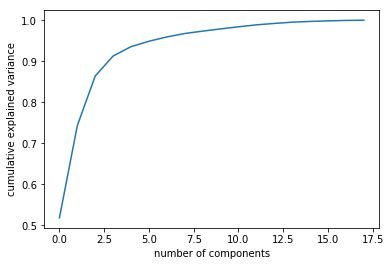

In [109]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(x_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [113]:

pca = PCA(n_components=4).fit(dataset)
pca.n_components_


4

In [114]:
components = pca.transform(dataset)
filtered_dataset = pca.inverse_transform(components)

In [111]:
components = pca.transform(x_new)
filtered_dataset = pca.inverse_transform(components)

Split the dataset

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x_new, result, test_size=0.20, random_state=42)

SVM Implementation Regression

In [95]:
from sklearn import svm
clf = svm.SVR()
clf.fit(dataset, result) 
prediction = clf.predict(dataset)

In [235]:
# Feature score
from sklearn import svm
clf = svm.SVR()
clf.fit(x_new, result)
prediction = clf.predict(x_new)

In [267]:
# Feature score
from sklearn import svm
clf = svm.SVR()
clf.fit(x_new_new, result)
prediction = clf.predict(x_new_new)

In [279]:
# Feature score
from sklearn import svm
clf = svm.SVR()
clf.fit(x_new_new_new, result)
prediction = clf.predict(x_new_new_new)

In [148]:
# Feature score
from sklearn import svm
clf = svm.SVR()
clf.fit(X_train, y_train) 
prediction = clf.predict(X_test)

In [115]:
# PCA
from sklearn import svm
clf = svm.SVR()
clf.fit(filtered_dataset, result) 
prediction = clf.predict(filtered_dataset)

10958.215653160878

MLP Implementation Regression

In [5]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(x_new, result)
prediction = clf.predict(x_new)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [284]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(result, prediction))

88.48037174790915

In [236]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test, prediction))

ValueError: Found input variables with inconsistent numbers of samples: [2763, 13814]

Evaluation MSE

In [201]:
import math

def round_custom(x):
    return int(round((x / 10.0),) * 10)

print roundup(45)
print roundup(46)
print roundup(42)
for i in range(len(prediction)):
    prediction[i] = round_custom(prediction[i])
print prediction

50
50
40
[  60.   70.   70. ...,  110.  100.  100.]


In [202]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(result, prediction))

91.544506656604

In [158]:
# Checking dataset
for index in range(10):
    print x_new[index]
    print

[ 4.85714286  3.93536081  3.51505133  3.57596639  3.97170732  5.06990014
  3.17197622  4.04113992  5.04952004  3.47427653  4.84375   ]

[ 4.85714286  3.80430928  3.5044806   3.58504202  4.03402439  5.11483595
  3.17197622  4.03149775  5.11122962  3.47876705  4.68585526]

[ 4.85714286  3.74724625  3.48947277  3.60672269  4.01902439  5.15977175
  3.16065849  4.01317763  5.13179948  3.46978601  5.24342105]

[ 6.14285714  3.7133953   3.48373064  3.61680672  3.99463415  5.20470756
  3.16065849  3.99244697  5.17979583  3.45481761  6.64473684]

[ 6.14285714  3.7520821   3.47433444  3.61680672  3.96634146  5.26248217
  3.16065849  3.98376902  5.22779217  3.45481761  6.55098684]

[ 6.14285714  3.70759228  3.46963633  3.60672269  3.99560976  5.28174037
  3.15448518  3.98810799  5.27578851  3.43835237  6.0625    ]

[ 7.42857143  3.66987266  3.46963633  3.60168067  4.00439024  5.31383738
  3.1479689   3.97943004  5.32378485  3.43835237  5.72697368]

[ 7.42857143  3.66406964  3.49573691  3.62689076

In [159]:
# Checking dataset
for index in range(10):
    print datatest[index]
    print

[1.0, 5.807417844643419, 5.942580271912064, 5.170596759320252, 5.173240250789276, 6.328611898016984, 4.005135573013788, 4.951726002703921, 6.29267241379309, 5.407178555202183, 4.511366245694603]

[1.0, 5.766919685468837, 5.952126120914083, 5.153998155710715, 5.153173297421593, 6.277620396600566, 4.007611652859721, 4.9463722397476335, 6.24094827586207, 5.405338482507952, 4.935017221584387]

[1.0, 5.7505567928730486, 5.959936361006649, 5.12238176788302, 5.139383698697142, 6.226628895184148, 4.007611652859721, 4.9597566471383505, 6.189224137931047, 5.391640163562015, 5.208036739380023]

[1.0, 5.803736193809366, 5.991611223604285, 5.115268080621789, 5.128818533505271, 6.175637393767694, 4.005135573013788, 4.97009914375845, 6.137499999999988, 5.367105860972283, 5.8858783008036735]

[1.0, 5.7947366028816845, 5.9733873300549645, 5.111316032143331, 5.128818533505271, 6.124645892351276, 4.005135573013788, 4.996781046803578, 6.0857758620689655, 5.345842798727853, 5.208036739380023]

[1.0, 5.4601

In [215]:
prediction = clf.predict(x_new)

In [214]:
headers = ['B']
df = pd.DataFrame(prediction,columns=headers)
df.to_csv('../data/submission2.csv')

In [216]:
for i in range(len(prediction)):
    print prediction[i]
    prediction[i] = math.exp(prediction[i])
    print prediction[i]

4.16670171848
64.5023539496
4.21717495133
67.841557614
4.25537837921
70.4834816274
4.1253120653
61.8871190595
4.13114322551
62.2490469698
4.12813794965
62.0622522371
4.19424040965
66.3033490604
4.23851527328
69.3048766103
4.53204401538
92.9483549126
4.7606105933
116.817231946
5.34001552189
208.515946825
5.24161891759
188.975791129
4.87526495829
131.008860496
4.68906713743
108.751682099
4.55381368615
94.9939956724
4.64724571833
104.297325399
4.73180700467
113.500473041
4.5978239963
99.2680727605
4.62155018962
101.651489137
4.7360395862
113.981891148
4.88743327146
132.612755899
4.74509535646
115.018772764
4.76460373482
117.284632262
4.77918769535
119.007640312
4.80006688545
121.51854507
4.76756376393
117.632312506
4.70519378259
110.519699666
4.73124959558
113.437224475
4.68213634298
108.000552514
4.69240112499
109.11486394
4.65243327954
104.83977995
4.58605212358
98.1063528687
4.47447244245
87.7482959208
4.40856902553
82.1518221931
4.27555850861
71.9202961993
4.23027699126
68.7362688828


47.2037784481
3.89437852761
49.1255137234
3.95197331477
52.0379528454
3.97739427247
53.3777649457
4.00404009017
54.8191776675
4.01207203239
55.2612551285
3.99721422128
54.4462633283
3.99429480488
54.2875438113
3.96973662656
52.9705779592
3.94505235593
51.6790437457
3.92419631164
50.6123851241
3.9058875915
49.6941684643
3.88988237797
48.9051338644
3.88655941124
48.7428934405
3.88151349912
48.4975605684
3.87798305575
48.3266445592
3.88299645516
48.5695336721
3.88452991869
48.6440704158
3.86131963173
47.5280294996
3.87955422485
48.4026335704
3.86343409631
47.6286321573
3.87035211331
47.9592702057
3.88417892097
48.6269994539
3.92971715079
50.8925807072
3.96108983427
52.514526905
3.99255428821
54.1931376175
4.00524955919
54.8855198759
4.07016641641
58.5667082425
4.09281602776
59.9083579893
4.42797453104
83.7615884795
4.737557923
114.155085498
4.91065824092
135.728727212
5.35367170914
211.38301167
4.97504379494
144.755164552
4.87995999015
131.625397468
4.88091997291
131.751816251
4.746828291

44.2044987681
3.78612903427
44.085416417
3.79694035917
44.5646239438
3.77887786356
43.7669017345
3.77333636232
43.525038157
3.79054154311
44.2803735152
3.78546545222
44.0561718301
3.82009204257
45.6084060424
3.8134759152
45.3076510329
3.82273960743
45.7293172451
3.83250357674
46.1780038119
3.81435460153
45.3474797424
3.82283058082
45.7334775855
3.81225254826
45.2522570407
3.80531883189
44.939575999
3.81015406773
45.1573956279
3.81989021685
45.5992020218
3.80462775451
44.9085300033
3.77778143841
43.7189409004
3.79314694173
44.3958919598
3.79579711429
44.5137047779
3.7801074817
43.8207514112
3.78870266823
44.199022269
3.81551821818
45.4002775369
3.87012269156
47.9482685676
3.82809302728
45.9747819313
3.95478429803
52.1844364447
3.94168175448
51.505147518
3.89501569265
49.1568247577
3.91732793158
50.2659511093
3.99442685787
54.2947131168
3.91535607993
50.1669317688
3.91083231774
49.9405010448
3.92094016818
50.4478519546
3.94370298874
51.6093567667
3.99859131311
54.5212924816
4.15622171336

50.5096288138
3.90666878987
49.7330046352
3.89104808386
48.9621761079
3.89401436114
49.1076271155
3.890970962
48.9584001991
3.88730057028
48.7790330677
3.86889931967
47.8896458697
3.87303790458
48.0882519264
3.85856960642
47.3975057696
3.84018586658
46.5341227741
3.83255941744
46.1805824955
3.81322276967
45.2961830552
3.79044628667
44.2761557254
3.77754416262
43.7085686848
3.77011891297
43.3852235949
3.73536570784
41.903347144
3.70689078716
40.7269806136
3.68460327781
39.8293181406
3.66733848636
39.1475752775
3.68499397238
39.8448822795
3.67177953595
39.3218182252
3.67193371624
39.3278813418
3.68710700256
39.9291647324
3.680332854
39.6595927298
3.66417360119
39.0238735513
3.67294401392
39.3676342871
3.66857241655
39.1959104678
3.65127725424
38.5238393763
3.65393785174
38.6264722789
3.64605013449
38.3229960278
3.64728588921
38.3703831246
3.64710683763
38.363513462
3.65009440203
38.4782983069
3.65550088621
38.6868939948
3.65895769669
38.8208586673
3.66878114739
39.204092717
3.65941375901

4.27037713229
71.5486138243
4.68947960572
108.796547972
4.97474369495
144.711730047
4.74096950979
114.545200558
4.79409071876
120.794495663
4.80793404628
122.478321415
4.80254451307
121.819996061
4.80959517573
122.681942836
4.4456287394
85.2534632016
4.42983253616
83.9173626094
4.46994164459
87.3516254244
4.51230058213
91.1312324164
4.5001564959
90.0312197146
4.46443298748
86.8717581979
4.45231875016
85.8257218609
4.4690249887
87.2715907307
4.4545973977
86.0215114145
4.79147221428
120.478608492
5.0851039452
161.596735569
5.2904195454
198.42665694
5.37486342069
215.910381406
5.61924345652
275.680739855
5.54353723526
255.580450608
5.56673387772
261.578355625
4.90059022631
134.369064441
4.88125911541
131.796506468
4.89143838733
133.144950391
4.89070909837
133.047884648
5.26739710148
193.910575446
5.25520081916
191.559950901
5.25509445131
191.539576164
4.7464279239
115.172145202
4.22797182089
68.5780025584
4.85642337701
128.563555451
4.33660467523
76.4475339809
4.29854418638
73.5925785979


54.9592405207
3.96536936892
52.7397462155
4.04056575037
56.858501426
4.15537342519
63.7757755831
4.52092498905
91.9205842002
4.48973066893
89.0974459362
4.46314773248
86.760177556
4.37477561019
79.4220160616
4.47996207138
88.2313261194
4.4894380918
89.0713818745
4.60679691631
100.162805417
4.58188734255
97.6986110584
4.60009075663
99.493344913
4.67705168699
107.452800603
4.28485900899
72.5923111347
4.29561267697
73.3771571702
4.30216094277
73.8592269373
4.36786179404
78.874800697
4.82552581845
124.651995474
4.79073687559
120.390048475
4.39813654164
81.2992296933
4.35291623494
77.7047381012
4.38804398385
80.4828391828
4.41561162405
82.7324265764
4.57783993856
97.3039844552
4.54198657894
93.8771092873
4.42488355732
83.5030833332
4.71053005929
111.111039738
4.43853214048
84.6505952521
4.42753374119
83.724675358
4.52332208726
92.1411911707
4.42815122763
83.7763901748
4.44563121485
85.2536742422
4.72937918133
113.225248177
4.76327164187
117.128502243
4.80015455265
121.529198727
4.8340789905

3.79893185183
44.6534624967
3.78683578974
44.1165850393
3.78908265722
44.2158206025
3.79041094595
44.2745910019
3.7917677042
44.3347016871
3.78905196238
44.2144634255
3.80503567109
44.9268526741
3.79514557302
44.484711708
3.82011685019
45.6095374926
3.84996627161
46.9914782581
3.86405666465
47.6582934678
3.93720721977
51.2752007838
3.93492832516
51.1584830491
4.01680486112
55.5234170792
4.02772667793
56.133157344
3.95913446484
52.4119419327
3.97119738118
53.0480115175
3.98427904248
53.746526544
3.9936315801
54.2515509038
4.01304677532
55.3151469078
4.09097502587
59.7981680499
4.16895456378
64.6478315826
4.28078446737
72.2971325093
4.42835485164
83.7934507962
4.36812269859
78.8953821761
4.38383536782
80.1448295914
4.35537089964
77.8957114706
4.43639886531
84.4702047194
4.34877247935
77.3834148611
4.31018439914
74.4542169682
4.45535638106
86.0868250929
4.58891561259
98.3876819304
4.77539165703
118.55673911
4.85634213661
128.55311132
4.80191572518
121.743421199
5.03205730542
153.247966478

4.42340168286
83.3794338857
4.33043529884
75.9773522255
4.30980047364
74.4256375819
4.32824241525
75.8109252806
4.47207830875
87.5384660486
4.57431637256
96.961730775
4.5004553701
90.0581317454
4.50037691277
90.051066302
4.57733131294
97.2545057398
4.43929155575
84.7149046232
4.41293337054
82.5111446213
4.37772860458
79.6568954578
4.31757691317
75.0066602684
4.26061429903
70.853495322
4.16874138164
64.6340512884
4.27143250796
71.6241643508
4.2863896186
72.7035067009
4.22863600939
68.6235664082
4.27429291827
71.8293321412
4.25478756006
70.4418509363
4.4523563301
85.8289472477
4.55232836024
94.8530033646
4.64552050062
104.11754493
4.62949861907
102.462678396
4.56955367256
96.5010291026
4.51775999042
91.6301155862
4.45765171441
86.2846500035
4.43134991068
84.044793333
4.43986868611
84.7638102771
4.46925157464
87.2913674861
4.61850356697
101.342266689
4.58963912191
98.458892093
4.76621653292
117.473941312
4.66583216439
106.253969212
4.73504026098
113.868043065
4.69618778453
109.528828057
4

44.156016545
3.77308556154
43.5141234123
3.7833007544
43.9609066785
3.76769427258
43.2801574548
3.76923938879
43.3470820176
3.77082555022
43.4158920446
3.78901186121
44.2126904094
3.9179093849
50.2951869121
4.12740887266
62.0170205679
4.25012080335
70.1138818266
4.12926770637
62.1324071054
3.95199258413
52.0389555932
3.90816631174
49.8075366901
3.94195882965
51.5194202929
4.00218155562
54.7173889501
4.10132716396
60.4204222167
4.14359634692
63.0290888066
4.19222819623
66.1700667128
4.26481430741
71.1517064018
4.1862977306
65.7788087245
4.18400215917
65.6279819534
4.19441758804
66.3150976218
4.32047061306
75.22402137
4.29537579623
73.3597775937
4.33819593802
76.5692789354
4.44412516775
85.12537483
4.38365639595
80.1304872049
4.5131108112
91.2050995106
4.86451615282
129.60821287
4.59448691021
98.9373587736
4.6528957654
104.88827808
4.58209386317
97.7187899197
4.5615556132
95.7322864661
4.56738051317
96.2915446885
4.74160539463
114.618061277
4.74186493569
114.647813231
4.72846270473
113.1

45.3275234784
3.81619905563
45.4311982709
3.81198824593
45.2402983445
3.80935352756
45.1212597846
3.79957276317
44.68209058
3.78988184796
44.2511716011
3.78669891899
44.1105471824
3.78840631646
44.1859257511
3.78924539713
44.2230168665
3.79470834069
44.4652658056
3.80587674166
44.9646552227
3.80963655802
45.1340322829
3.82520245491
45.842080381
3.89925374251
49.3655959104
3.89537921165
49.1746974455
3.88436985709
48.636284991
3.89580552928
49.1956659555
3.83453501337
46.271906847
3.84668522706
46.8375497855
3.86280550307
47.598702529
4.0511237813
57.4619954913
3.96801349099
52.8793810669
3.99245042365
54.1875091636
4.07670921349
58.9511546358
4.12923502832
62.1303767723
4.14154068269
62.8996552448
4.1714528507
64.8095423304
4.19782284946
66.5413027907
4.28187874841
72.3762891926
4.28415566702
72.541271867
4.23816644927
69.2807056217
4.20686397941
67.1456391814
4.20787666056
67.2136707459
4.19448143855
66.3193320098
4.30549551996
74.1059273227
4.38771312366
80.4562150202
4.3607292713
78

46.0492372564
3.82590832279
45.8744502563
3.82950067522
46.0395438088
3.80114419277
44.7523605373
3.78711088597
44.1287230148
3.80187745005
44.7851875653
3.79087296661
44.2950515039
3.81486912586
45.3708181277
3.80806274383
45.0630555693
3.81660549885
45.4496672268
3.82318565762
45.7497193655
3.81937925892
45.5759086995
3.83342478956
46.220563181
3.82978833145
46.0527892755
3.83037214028
46.0796831502
3.83471462227
46.2802184394
3.85224526175
47.0986934983
3.84717856609
46.8606622775
3.83164847505
46.1385338002
3.83494999386
46.2911127703
3.84228028451
46.6316868096
3.83480437255
46.2843722886
3.84338056579
46.6830230187
3.8656341976
47.733535329
3.84814731472
46.9060804757
3.8740197607
48.1354908576
3.90586021572
49.6928080665
3.9038412363
49.5925805223
3.93310599959
51.0653405312
3.95198440188
52.0385297991
3.96464002459
52.7012948046
3.965726018
52.7585591522
3.97959726636
53.4954854571
3.98671100892
53.8773953627
3.99411082694
54.2775570194
4.00876681765
55.0789063308
4.02324709056

3.94844094927
51.8544600487
3.93621254233
51.224223855
3.95957897079
52.4352445313
3.95208043941
52.0435276909
3.91912579573
50.3564037475
3.91437609796
50.1177931616
3.92599067744
50.7032837851
3.92255713536
50.5294904608
3.92246463536
50.5248166993
3.92863745626
50.8376619191
3.9143565584
50.1168138912
3.92428634755
50.6169422614
3.93326359711
51.0733889365
3.92985908833
50.8998047875
3.91516667914
50.1574310118
3.91090208472
49.9439853644
3.91959115491
50.3798430155
3.91752057467
50.2756354305
3.93137745925
50.9771482739
3.91271364788
50.03454405
3.90613603541
49.7065162119
3.93065196889
50.9401782565
3.91782478667
50.2909322085
3.94919119085
51.8933780179
3.9367574351
51.2521431701
3.94060476797
51.4497070288
3.94320466866
51.5836451949
3.94502832022
51.6778016183
3.9684199463
52.9008785408
3.96589009073
52.7672161032
3.96438896222
52.6880651533
3.97559539184
53.2818310312
3.9917552116
54.1498504463
3.98348005466
53.7036008747
3.97243612782
53.1137652814
3.97928852721
53.4789718553

4.50543931422
90.5080968098
4.57090409881
96.6314346572
4.63131995093
102.649466988
4.40622103548
81.9591568087
4.35926765627
78.1998442823
4.28748770433
72.7833852325
4.22355049032
68.2754658394
4.28228300101
72.4055534101
4.09437620101
60.0018983573
4.03140135163
56.3398078346
3.9190006888
50.3501042062
3.89242998071
49.029883556
3.91107553949
49.9526491382
3.93685362064
51.2570731225
3.95999383629
52.4570026184
3.96249198245
52.5882116996
3.98046693077
53.5420288125
3.96340185704
52.6360821519
3.9635633807
52.644584811
3.96374342667
52.6540641099
3.96903609452
52.9334833666
3.97317924492
53.1532496975
3.96490634519
52.7153321142
3.95837165149
52.3719766485
3.95720628743
52.310979778
3.976863961
53.3494656093
3.95566267723
52.2302943053
3.95830538086
52.3685060396
3.95455006522
52.1722145688
3.95738652232
52.3204088915
3.96246719893
52.5869083945
3.95267818001
52.0746455196
3.96287132786
52.6081645804
3.96803559181
52.8805497575
3.97007489937
52.9884994962
3.9723664948
53.110066938
3

109.2569155
4.22297163669
68.2359557745
4.85332831855
128.166258875
4.54012618051
93.7026228183
4.61891917999
101.384394608
5.06358454974
158.156421019
4.48161784881
88.3775385727
4.41854919174
82.9758159909
4.56799082717
96.3503307039
4.85619053766
128.53362428
5.1019173711
164.336699856
5.61210787973
273.720600444
5.72166792898
305.41390707
5.65591558997
285.978201667
5.57707230973
264.296693131
5.66089902074
287.406911218
5.25229525654
191.004169288
5.34945949999
210.494494837
5.69332649463
296.879548113
5.50612438124
246.195117285
4.96142972377
142.797811445
4.96562477204
143.398113425
4.76509691529
117.342489018
4.86042549289
129.079112669
4.83978912945
126.44268588
4.88765674131
132.642394163
4.74376515951
114.865876856
4.77134315103
118.077731727
4.79271457393
120.628379269
4.80063847084
121.588023149
4.80835229693
122.529558766
4.79344323017
120.716307922
4.80423385021
122.025965031
4.54244854672
93.9204875059
4.41095727836
82.3482559882
4.42587299689
83.5857454755
4.5084577724

123.531332948
4.80587562839
122.226469144
4.78227721011
119.375884728
4.76364823592
117.172620448
4.85246333044
128.05544452
5.19659631444
180.656296998
5.75844015448
316.853700422
5.55427000329
258.338309554
5.49780855914
244.156291492
5.34097750907
208.716633006
4.97822721324
145.216715057
4.79511681385
120.918505914
4.74557194482
115.073602436
4.7276174119
113.025947009
4.72439358517
112.662157652
4.62463675097
101.965727403
4.90826140668
135.403797509
4.81754695076
123.66137098
4.59998714859
99.4830371366
4.4493979401
85.5754069688
4.61249246017
100.734914758
4.72227145859
112.423327796
4.72553801341
112.791165212
4.72680160689
112.933777476
4.67469311328
107.19966389
4.4487851999
85.5229875376
4.55463289502
95.0718474795
4.14537609783
63.1413647671
4.0529391084
57.5664025463
3.96562659646
52.7533140757
3.94292356168
51.5691467103
3.93745978193
51.2881525948
3.93428602803
51.1256346527
3.93219424188
51.0188025319
3.92462550466
50.6341122686
3.9305700925
50.9360076297
3.93760337161


85.4198411496
4.41151535727
82.3942256393
4.26162979532
70.9254833292
4.14831925333
63.3274733606
4.22726931212
68.5298428284
4.22423198005
68.3220107263
4.20547383017
67.0523615724
4.19736133479
66.5106000887
4.16000341898
64.0717416594
4.59997529259
99.4818576723
4.52769136645
92.5446625575
4.63644672366
103.177078793
4.59873520686
99.3585681015
4.60602762319
100.08578049
4.62869627835
102.380501389
4.6446651974
104.028530932
4.57896230585
97.413256575
4.70316344449
110.295534951
4.69866838525
109.800862611
4.69017953419
108.87272443
4.68764645702
108.597290412
4.81365744778
123.181323886
4.81911345401
123.855238728
4.55441036043
95.0506930594
4.55035553791
94.6660597051
4.47611231972
87.8923104074
4.76657458665
117.516010826
5.15623067326
173.509208562
5.4429134123
231.114535497
5.66809288819
289.481933211
5.09389419462
163.023472682
4.98121852654
145.651754093
4.42369871642
83.4042040547
4.32315704265
75.4263770926
4.35410913177
77.7974871461
4.518170252
91.6677156149
4.59006247446

In [273]:
for i in range(len(result)):
    result[i] = math.log(result[i])
    prediction[i] = math.log(prediction[i])

In [282]:
for i in range(len(prediction)):
    prediction[i] = math.exp(prediction[i])
    result[i] = math.exp(result[i])

In [283]:
for i in range(len(prediction)):
    print "result = "+str(result[i])+"\t prediction = "+str(prediction[i])

result = 60.0	 prediction = 54.2875343558
result = 60.0	 prediction = 52.1030339214
result = 50.0	 prediction = 55.2602834567
result = 50.0	 prediction = 55.2699192484
result = 60.0	 prediction = 54.2853959765
result = 50.0	 prediction = 50.9876813231
result = 60.0	 prediction = 59.3515788283
result = 60.0	 prediction = 68.7593647512
result = 60.0	 prediction = 78.0393538685
result = 70.0	 prediction = 109.812975499
result = 230.0	 prediction = 208.102364655
result = 580.0	 prediction = 301.942729792
result = 430.0	 prediction = 334.913400772
result = 250.0	 prediction = 226.206112085
result = 100.0	 prediction = 110.493232235
result = 100.0	 prediction = 89.1363488655
result = 90.0	 prediction = 93.3991606241
result = 70.0	 prediction = 101.342129978
result = 80.0	 prediction = 101.92774777
result = 140.0	 prediction = 107.04756096
result = 120.0	 prediction = 126.44299759
result = 190.0	 prediction = 127.226379628
result = 110.0	 prediction = 121.594779279
result = 110.0	 prediction 

result = 50.0	 prediction = 38.3589568824
result = 50.0	 prediction = 39.7047162127
result = 50.0	 prediction = 41.567016221
result = 40.0	 prediction = 42.2306683917
result = 40.0	 prediction = 40.9663414323
result = 50.0	 prediction = 39.798220545
result = 40.0	 prediction = 39.2097706337
result = 40.0	 prediction = 39.6004977628
result = 40.0	 prediction = 41.2560274366
result = 40.0	 prediction = 44.2034127437
result = 20.0	 prediction = 58.422091539
result = 30.0	 prediction = 77.7256517093
result = 30.0	 prediction = 89.4045624008
result = 70.0	 prediction = 119.391455125
result = 230.0	 prediction = 194.319817895
result = 660.0	 prediction = 269.04605222
result = 510.0	 prediction = 256.658874281
result = 300.0	 prediction = 271.388802509
result = 300.0	 prediction = 320.907232072
result = 350.0	 prediction = 328.890626096
result = 90.0	 prediction = 222.50300122
result = 100.0	 prediction = 120.0093236
result = 130.0	 prediction = 96.7795842821
result = 200.0	 prediction = 166.

result = 50.0	 prediction = 47.4840102614
result = 50.0	 prediction = 47.6139048167
result = 30.0	 prediction = 48.3225939046
result = 40.0	 prediction = 48.7403773591
result = 30.0	 prediction = 48.5605020913
result = 20.0	 prediction = 48.2124717543
result = 20.0	 prediction = 48.0643155775
result = 30.0	 prediction = 47.967608665
result = 40.0	 prediction = 47.5902536498
result = 50.0	 prediction = 47.4870256859
result = 40.0	 prediction = 47.5058022383
result = 40.0	 prediction = 47.6335682469
result = 50.0	 prediction = 52.8447324974
result = 60.0	 prediction = 60.6394273952
result = 70.0	 prediction = 67.3212862077
result = 60.0	 prediction = 62.2058664845
result = 70.0	 prediction = 65.9343755494
result = 70.0	 prediction = 61.435076354
result = 70.0	 prediction = 73.816933192
result = 50.0	 prediction = 79.8505761065
result = 70.0	 prediction = 68.1415694401
result = 80.0	 prediction = 75.9833851369
result = 110.0	 prediction = 95.1415718941
result = 80.0	 prediction = 87.64939

result = 60.0	 prediction = 64.1282000617
result = 70.0	 prediction = 64.7007004955
result = 60.0	 prediction = 64.244868755
result = 60.0	 prediction = 63.0730058275
result = 70.0	 prediction = 62.3562911092
result = 70.0	 prediction = 61.5901650548
result = 70.0	 prediction = 60.9490514533
result = 70.0	 prediction = 61.1509276143
result = 70.0	 prediction = 61.4904057062
result = 70.0	 prediction = 61.5578536216
result = 60.0	 prediction = 61.9438410275
result = 70.0	 prediction = 63.4981006941
result = 60.0	 prediction = 64.17319286
result = 60.0	 prediction = 64.8406547883
result = 50.0	 prediction = 65.9186166859
result = 60.0	 prediction = 65.6957062473
result = 50.0	 prediction = 64.225700928
result = 60.0	 prediction = 62.9601740122
result = 70.0	 prediction = 62.6835592288
result = 60.0	 prediction = 63.086981357
result = 100.0	 prediction = 64.0348657546
result = 80.0	 prediction = 78.8211752554
result = 100.0	 prediction = 94.2207087668
result = 120.0	 prediction = 105.4801

result = 80.0	 prediction = 105.7763654
result = 90.0	 prediction = 101.093355686
result = 90.0	 prediction = 96.0632972119
result = 80.0	 prediction = 88.4204932507
result = 50.0	 prediction = 81.2288205852
result = 50.0	 prediction = 65.4289548907
result = 50.0	 prediction = 56.9001170188
result = 50.0	 prediction = 53.41956774
result = 50.0	 prediction = 52.5318427734
result = 60.0	 prediction = 52.7132722655
result = 60.0	 prediction = 52.2229623835
result = 50.0	 prediction = 51.1819632847
result = 50.0	 prediction = 50.054129122
result = 40.0	 prediction = 49.9695352842
result = 50.0	 prediction = 49.0199291412
result = 50.0	 prediction = 48.5393020121
result = 50.0	 prediction = 47.9554203782
result = 50.0	 prediction = 47.8023653943
result = 50.0	 prediction = 47.2528193642
result = 50.0	 prediction = 46.1268060428
result = 50.0	 prediction = 45.7459065226
result = 50.0	 prediction = 45.2535554268
result = 40.0	 prediction = 44.5956616075
result = 40.0	 prediction = 44.75411399

result = 40.0	 prediction = 45.3248511999
result = 40.0	 prediction = 45.095193189
result = 60.0	 prediction = 44.8577171011
result = 50.0	 prediction = 44.6626532659
result = 50.0	 prediction = 44.6629135002
result = 60.0	 prediction = 44.7260954648
result = 40.0	 prediction = 44.8308189768
result = 50.0	 prediction = 44.90663047
result = 40.0	 prediction = 44.9343235175
result = 50.0	 prediction = 45.0254693486
result = 40.0	 prediction = 45.1215062264
result = 50.0	 prediction = 45.2435273768
result = 50.0	 prediction = 45.3244615784
result = 40.0	 prediction = 45.2603987648
result = 20.0	 prediction = 45.3707447731
result = 20.0	 prediction = 45.4357277855
result = 30.0	 prediction = 45.3988548682
result = 50.0	 prediction = 45.3017190917
result = 40.0	 prediction = 45.168335757
result = 50.0	 prediction = 45.3666469683
result = 60.0	 prediction = 45.7287524324
result = 50.0	 prediction = 45.9252726529
result = 50.0	 prediction = 46.5643061926
result = 40.0	 prediction = 47.5060664

result = 50.0	 prediction = 71.7548701959
result = 40.0	 prediction = 92.0127279447
result = 40.0	 prediction = 104.003390382
result = 60.0	 prediction = 115.603701756
result = 50.0	 prediction = 121.504017651
result = 90.0	 prediction = 163.063295663
result = 90.0	 prediction = 239.770888498
result = 560.0	 prediction = 291.202855668
result = 410.0	 prediction = 281.592243657
result = 170.0	 prediction = 198.10212514
result = 110.0	 prediction = 144.587676162
result = 130.0	 prediction = 119.037668607
result = 140.0	 prediction = 113.056120777
result = 140.0	 prediction = 111.565304185
result = 140.0	 prediction = 120.523872589
result = 110.0	 prediction = 119.503001588
result = 140.0	 prediction = 111.866468483
result = 140.0	 prediction = 115.394758061
result = 140.0	 prediction = 131.181813699
result = 130.0	 prediction = 133.828718674
result = 120.0	 prediction = 134.226609092
result = 140.0	 prediction = 136.820292575
result = 120.0	 prediction = 132.62900722
result = 120.0	 pred

result = 60.0	 prediction = 55.577413743
result = 50.0	 prediction = 54.4447699441
result = 60.0	 prediction = 54.2718674743
result = 60.0	 prediction = 54.2737370804
result = 60.0	 prediction = 50.9698602751
result = 30.0	 prediction = 48.823811226
result = 30.0	 prediction = 46.3031520402
result = 40.0	 prediction = 45.2438278632
result = 30.0	 prediction = 45.0451723804
result = 70.0	 prediction = 45.6166097835
result = 60.0	 prediction = 46.9756563991
result = 70.0	 prediction = 47.3282525155
result = 60.0	 prediction = 49.7829064044
result = 70.0	 prediction = 51.9435655424
result = 60.0	 prediction = 53.4653162262
result = 60.0	 prediction = 54.3071499963
result = 60.0	 prediction = 54.4157221624
result = 60.0	 prediction = 54.4315792475
result = 60.0	 prediction = 54.3986132361
result = 60.0	 prediction = 54.6863494014
result = 70.0	 prediction = 54.2121442391
result = 60.0	 prediction = 52.9566049579
result = 70.0	 prediction = 53.1473634319
result = 60.0	 prediction = 53.38458

result = 30.0	 prediction = 52.3560563598
result = 30.0	 prediction = 52.4896001547
result = 20.0	 prediction = 52.3772298672
result = 30.0	 prediction = 52.334594715
result = 60.0	 prediction = 52.4769719238
result = 60.0	 prediction = 52.5192186275
result = 60.0	 prediction = 52.25352607
result = 60.0	 prediction = 51.9290390179
result = 50.0	 prediction = 51.8702988427
result = 50.0	 prediction = 51.6931242945
result = 50.0	 prediction = 51.6681284485
result = 50.0	 prediction = 50.7930664563
result = 50.0	 prediction = 49.1432243551
result = 60.0	 prediction = 48.8310119859
result = 60.0	 prediction = 49.032121456
result = 50.0	 prediction = 50.275705635
result = 50.0	 prediction = 51.0545345312
result = 50.0	 prediction = 51.5637115594
result = 50.0	 prediction = 51.9557527848
result = 60.0	 prediction = 51.9143689937
result = 40.0	 prediction = 51.9728434837
result = 60.0	 prediction = 52.0972591126
result = 50.0	 prediction = 51.8419962419
result = 50.0	 prediction = 51.70658157

result = 40.0	 prediction = 51.3412494297
result = 70.0	 prediction = 50.2464532002
result = 50.0	 prediction = 50.1132073821
result = 50.0	 prediction = 49.5618334988
result = 60.0	 prediction = 48.650383048
result = 60.0	 prediction = 48.4302196517
result = 40.0	 prediction = 48.0411096598
result = 50.0	 prediction = 47.997852686
result = 50.0	 prediction = 48.3683634962
result = 50.0	 prediction = 48.636439297
result = 40.0	 prediction = 48.5974483022
result = 70.0	 prediction = 48.4132324791
result = 60.0	 prediction = 48.6000598958
result = 60.0	 prediction = 48.2977840599
result = 50.0	 prediction = 48.2980605261
result = 60.0	 prediction = 47.3240556496
result = 40.0	 prediction = 46.2290262068
result = 50.0	 prediction = 46.9271955383
result = 50.0	 prediction = 46.9484354552
result = 50.0	 prediction = 48.6018774444
result = 40.0	 prediction = 49.3185453214
result = 60.0	 prediction = 49.750928307
result = 50.0	 prediction = 50.2128516733
result = 60.0	 prediction = 50.3765289

In [200]:
print max(prediction)

669.862461565
